## UNET parameter equation

In [2]:
def calculateUNETParameters(cd, cp, A, N):
    """
    
    :param cd: kernel size in convs
    :param cp: kernel size in pooling
    :param A: activation maps
    :param N: layers
    :return: 
    """
    encoder = ((2**(2*N-1)-1)*A**2+A)*cd**3 + 2*(2**N-1)*A
    print('encoder : ' + str(encoder))
    decoder_convs = cd**3*(4**(N-1)-1)*A**2 + 2*(2**(N-1)-1)*A
    print('decoder_convs : ' + str(decoder_convs))
    decoder_upconvs = cp**3*A**2*((1/6)*(4**(N)-4)) + (2**(N-1)-1) * A
    print('decoder_upconvs : ' + str(decoder_upconvs))
    decoder = decoder_convs + decoder_upconvs + A + 1
    print('decoder : ' + str(decoder))

    return encoder + decoder

## Jiaming net

In [3]:
calculateUNETParameters(3,2,16,4)

encoder : 878736
decoder_convs : 435680
decoder_upconvs : 86128.0
decoder : 521825.0


1400561.0

## DeepNet

In [4]:
calculateUNETParameters(3,2,16,5)

encoder : 3533456
decoder_convs : 1763040
decoder_upconvs : 348400.0
decoder : 2111457.0


5644913.0

# Bigger Kernel

In [5]:
calculateUNETParameters(5,2,8,4)

encoder : 1017240
decoder_convs : 504112
decoder_upconvs : 21560.0
decoder : 525681.0


1542921.0

# Deep but approx same params

In [6]:
calculateUNETParameters(3,2,8,5)

encoder : 883720
decoder_convs : 440880
decoder_upconvs : 87160.0
decoder : 528049.0


1411769.0

 ## Even bigger kernel same params
 Bit odd because the kernel is an even number, Jiaming recons that wont be a good idea

In [31]:
calculateUNETParameters(6, 2, 3, 5)

encoder : 994218
decoder_convs : 495810
decoder_upconvs : 12285.0
decoder : 508099.0


1502317.0

In [34]:
calculateUNETParameters(10, 2, 16, 4)

encoder : 32528480
decoder_convs : 16128224
decoder_upconvs : 86128.0
decoder : 16214369.0


48742849.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

encoder : [ 450147.072       456994.6771686   463911.44948104  470897.73651089
  477953.88583176  485080.24501722  492277.16164087  499544.98327629
  506884.05749706  514294.73187678  521777.35398904  529332.27140741
  536959.83170548  544660.38245686  552434.27123511  560281.84561382
  568203.4531666   576199.44146701  584270.15808866  592415.95060511
  600637.16658998  608934.15361683  617307.25925926  625756.83109085
  634283.2166852   642886.76361588  651567.81945649  660326.73178062
  669163.84816184  678079.51617375  687074.08338993  696147.89738398
  705301.30572947  714534.656       723848.29576915  733242.57261051
  742717.83409767  752274.42780421  761912.70130373  771633.0021698
  781435.67797601  791321.07629596  801289.54470323  811341.43077141
  821477.08207407  831696.84618482  842001.07067724  852390.10312491
  862864.29110143  873423.98218037  884069.52393533  894801.2639399
  905619.54976765  916524.72899218  927517.14918708  938597.15792593
  949765.10278231  961021.

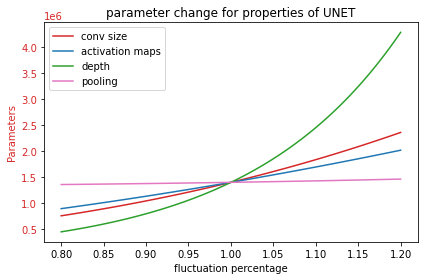

In [56]:
fluct_amount = np.linspace(0.8, 1.2, 100)

fig, ax1 = plt.subplots()

colour1 = 'tab:red'
ax1.set_title('parameter change for properties of UNET')
ax1.set_xlabel('fluctuation percentage')
ax1.plot(fluct_amount, calculateUNETParameters(fluct_amount*3,2,16,4)
, label='conv size', color=colour1)
ax1.tick_params(axis='y', labelcolor=colour1)
ax1.set_ylabel('Parameters', color=colour1)

colour2 = 'tab:blue'
ax1.plot(fluct_amount, calculateUNETParameters(3,2,fluct_amount*16,4)
, label='activation maps', color=colour2)

colour2 = 'tab:green'
ax1.plot(fluct_amount, calculateUNETParameters(3,2,16,fluct_amount*4)
, label='depth', color=colour2)

colour2 = 'tab:pink'
ax1.plot(fluct_amount, calculateUNETParameters(3,fluct_amount*2,16,4)
, label='pooling', color=colour2)
plt.legend()
fig.tight_layout()
plt.show()

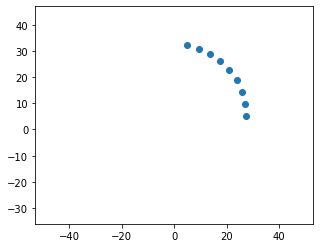

In [59]:
r = 27.5
theta = np.arange(0, np.pi/2, 2*np.pi/36)
plt.scatter(r * np.cos(theta), r * np.sin(theta) + 5)
plt.xlim(-53, 53)
plt.ylim(-36, 47)
plt.gca().set_aspect('equal')
plt.show()